### LIBRARIES

In [1]:
from main import ClusterHandler, load_sns_theme
import pandas as pd
from pyspark.ml.feature import PCA
from pyspark.ml.regression import LinearRegression

### DATASET

In [2]:
data = pd.read_csv("data/superconductivity.csv")

### SPARK SESSION

In [3]:
handler = ClusterHandler()
#handler = ClusterHandler(type='remote', ip='192.168.137.1', port='7077')

handler.context


Session 'Session' created on masternode local[*]
Spark UI (jobs tab) is available at http://SERENITY.mshome.net:4040



<SparkContext master=local[*] appName=Session>

### RIDGE REGRESSION

In [4]:
handler.generate_dataframe(data=data)
handler.dataframe.show()

+------------------+----------------+--------------------+-----------------+---------------------+-------------------+-----------------------+-----------------+---------------------+----------------+-------------------+--------+----------------+----------------+----------------+----------------+-----------------+---------+----------------+----------------+----------------+------------------+----------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+-----------------+---------------------+------------+----------------+----------------+-----------------+-----------------+-------------------+-------------+-----------------+----------------+----------------+---------------------+-------------------------+----------------------+--------------------------+------------------------+----------------------------+----------------------+--------------------------+--------------------+---------------

In [5]:
input_columns = [feature for feature in data.columns if feature != "critical_temp"]
handler.assemble_features(input_columns=input_columns)

In [6]:
ridge = LinearRegression(featuresCol="features", labelCol="critical_temp")

fit_results = handler.fit_lr(model=ridge, y_column="critical_temp", folds=5, reg_params=[0.001, 0.01, 0.1, 0.5, 1.0])
fit_results

{0.001: 0.7353324067473579,
 0.01: 0.7342068027584461,
 0.1: 0.7280153309529711,
 0.5: 0.7144644521950589,
 1.0: 0.7065832450512379}

In [7]:
print(handler.extract_lr_coefficients())

{'entropy_fie': -84.79324148723532, 'wtd_entropy_Valence': -69.17962819798086, 'entropy_Valence': 67.22195947998692, 'entropy_atomic_radius': 51.914579951638586, 'wtd_entropy_fie': 43.37510100225541, 'wtd_entropy_atomic_radius': 42.576490798097026, 'entropy_atomic_mass': -35.76183520146677, 'wtd_entropy_FusionHeat': 24.89150479415224, 'wtd_std_Valence': -23.222527794947887, 'wtd_gmean_Valence': -20.95879781097606, 'wtd_entropy_ElectronAffinity': -20.70335563031952, 'wtd_entropy_Density': -18.888698515919987, 'entropy_FusionHeat': -18.4751264780324, 'wtd_mean_Valence': 16.84420537162737, 'entropy_Density': 16.56739930819948, 'gmean_Valence': 16.21284018399063, 'mean_Valence': -11.968489025211072, 'entropy_ThermalConductivity': 10.873451099458071, 'wtd_entropy_atomic_mass': 5.107625561688681, 'range_Valence': 4.854949126084148, 'std_Valence': 4.8531162854872285, 'entropy_ElectronAffinity': 3.857696141085611, 'number_of_elements': -3.5442808651730093, 'wtd_mean_atomic_radius': 2.572467223

### PCA - PRINCIPAL COMPONENT ANALYSIS

In [4]:
handler.generate_dataframe(data=data, y="critical_temp")
handler.dataframe.show()

+------------------+----------------+--------------------+-----------------+---------------------+-------------------+-----------------------+-----------------+---------------------+----------------+-------------------+--------+----------------+----------------+----------------+----------------+-----------------+---------+----------------+----------------+----------------+------------------+----------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+-----------------+---------------------+------------+----------------+----------------+-----------------+-----------------+-------------------+-------------+-----------------+----------------+----------------+---------------------+-------------------------+----------------------+--------------------------+------------------------+----------------------------+----------------------+--------------------------+--------------------+---------------

In [5]:
handler.assemble_features()
handler.scale_features()

In [6]:
dimensions = 5
model = PCA(k=dimensions, inputCol="scaledFeatures", outputCol="pcaFeatures")
handler.fit_pca(model)

explained_variance = handler.pca_model.explainedVariance
explained_variance

DenseVector([0.3893, 0.1048, 0.0952, 0.0791, 0.0588])

In [7]:
for dim in range(0, dimensions): 
    print(f"Coefficients for dimension {dim}: {handler.extract_pca_coefficients(dimension=dim)}")

Coefficients for dimension 0: {'range_fie': -0.1639782764776125, 'wtd_std_fie': -0.16348764769240792, 'range_atomic_radius': -0.1634811625790672, 'wtd_entropy_atomic_radius': -0.16345692130405054, 'wtd_std_atomic_radius': -0.16047256302228072, 'entropy_Valence': -0.15874646513076654, 'entropy_fie': -0.15662157955307526, 'wtd_entropy_atomic_mass': -0.15646455562351227, 'wtd_entropy_Valence': -0.1560122414245672, 'number_of_elements': -0.15577832905215527, 'wtd_gmean_Density': 0.1556402231571363, 'std_fie': -0.1553437471172357, 'entropy_atomic_radius': -0.1533936897818123, 'gmean_Density': 0.15048198242158242, 'std_atomic_radius': -0.14970272803185963, 'wtd_gmean_Valence': 0.14662669182410515, 'entropy_atomic_mass': -0.1464185352807459, 'wtd_mean_Valence': 0.1445689089556572, 'range_ThermalConductivity': -0.14328760989290723, 'wtd_entropy_FusionHeat': -0.14307348824604427, 'gmean_Valence': 0.14108114411092756, 'entropy_ElectronAffinity': -0.14001682948911232, 'mean_Valence': 0.1396859022

In [8]:
load_sns_theme(r"utilities\themes\fire_theme.json")

{'figure.facecolor': '#202021',
 'axes.facecolor': '#262626',
 'axes.edgecolor': '#cfcfd1',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#ffffff',
 'ytick.color': '#ffffff',
 'axes.labelcolor': '#ffffff'}

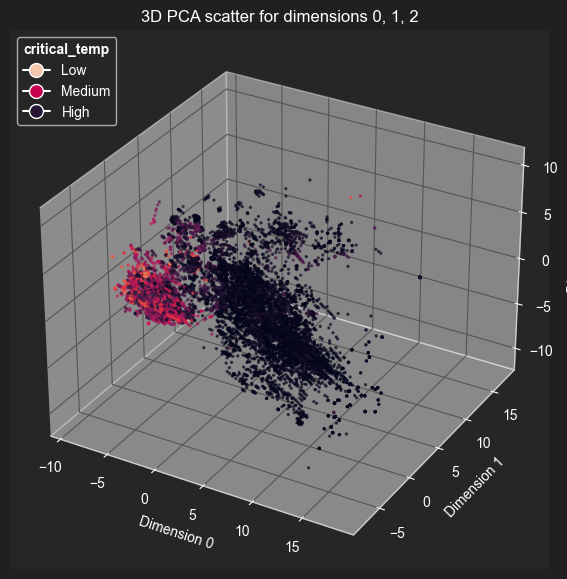

In [9]:
handler.plot_3d_pca(dimensions=[0,1,2], color_by="critical_temp")

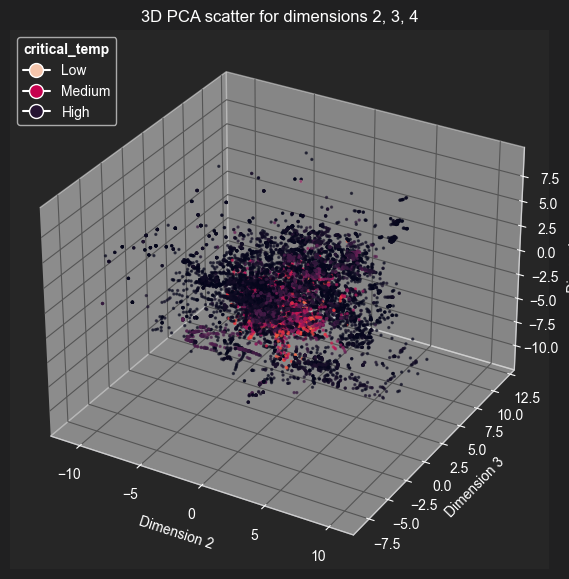

In [19]:
handler.plot_3d_pca(dimensions=[2,3,4], color_by="critical_temp")